In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread 

In [2]:
my_data_dir=r'C:\Users\JATIN\Downloads\cell_images\cell_images'

In [3]:
os.listdir(my_data_dir)

['test', 'train']

In [4]:
test_path= my_data_dir + '\\test\\'
train_path= my_data_dir + '\\train\\'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path + '\\parasitized\\')[0]  # picking up the first image


'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
para_cell=train_path + '\\parasitized\\' + os.listdir(train_path + '\\parasitized\\')[0]

In [9]:
para_img=imread(para_cell)

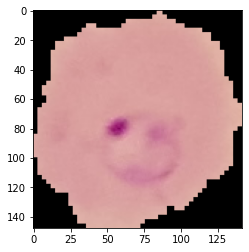

In [10]:
plt.imshow(para_img)

In [11]:
os.listdir(train_path+'\\uninfected')

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61ThinF_IMG_20150918_144823_cell_151.png',
 'C100P61ThinF_IMG_20150918_144823_cell_21.png',
 'C100P61T

In [12]:
uninfected_cell_path=train_path + '\\uninfected\\' + os.listdir(train_path+'\\uninfected')[0]

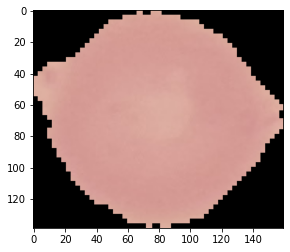

In [13]:
uninfected_img=imread(uninfected_cell_path)
plt.imshow(uninfected_img)

In [14]:
len(os.listdir(train_path+'\\parasitized'))
len(os.listdir(train_path+'\\uninfected'))

12480

In [15]:
uninfected_img.shape

(139, 160, 3)

In [16]:
para_img.shape

(148, 142, 3)

In [17]:
dim1=[]
dim2=[]
for image_filename in os.listdir(test_path + '\\uninfected'):
    img= imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colours=img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\JATIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


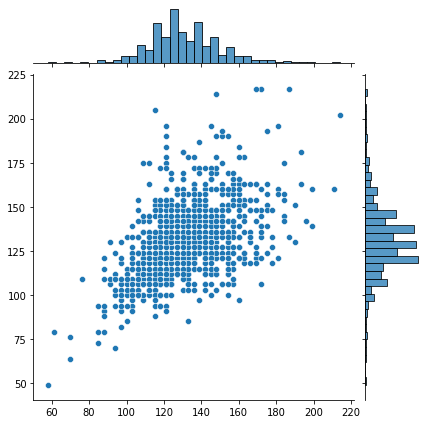

In [18]:
sns.jointplot(dim1,dim2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape=(130,130,3)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

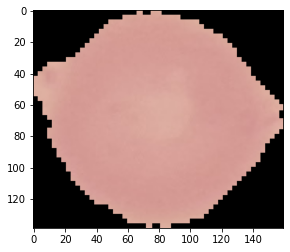

In [24]:
plt.imshow(uninfected_img)

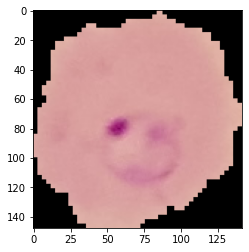

In [25]:
plt.imshow(para_img)

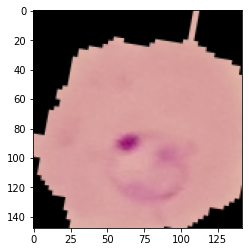

In [26]:
plt.imshow(image_gen.random_transform(para_img))

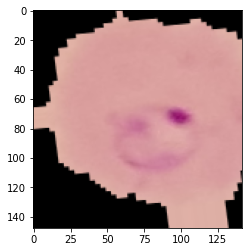

In [27]:
plt.imshow(image_gen.random_transform(para_img))

In [28]:
image_gen.flow_from_directory(train_path) 
# from flow from directory, the dataset should be organized into separate classes already otherwise this method wont work

Found 24958 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [34]:
image_shape

(130, 130, 3)

In [36]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop= EarlyStopping(monitor='val_loss', patience=2)

In [40]:
batch_size=16

In [41]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [42]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [62]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [47]:
from tensorflow.keras.models import load_model
model=load_model('malaria_detector.h5')

In [52]:
losses=pd.DataFrame(model.history.history) #we imported the model so it has no history to display atm

AttributeError: 'NoneType' object has no attribute 'history'

In [50]:
model.metrics_names

['loss', 'accuracy']

In [53]:
model.evaluate_generator(test_image_gen)

C:\Users\JATIN\AppData\Local\Temp\ipykernel_35948\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.14573726058006287, 0.9496153593063354]

In [54]:
pred_probabilities = model.predict_generator(test_image_gen)

C:\Users\JATIN\AppData\Local\Temp\ipykernel_35948\3998936794.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_image_gen)


In [55]:
pred_probabilities

array([[4.4539437e-04],
       [5.5584172e-04],
       [1.2376389e-04],
       ...,
       [9.8611832e-01],
       [9.8775166e-01],
       [9.6078008e-01]], dtype=float32)

In [56]:
predictions = pred_probabilities > 0.5

In [57]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [63]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1214,   86],
       [  48, 1252]], dtype=int64)

<AxesSubplot:>

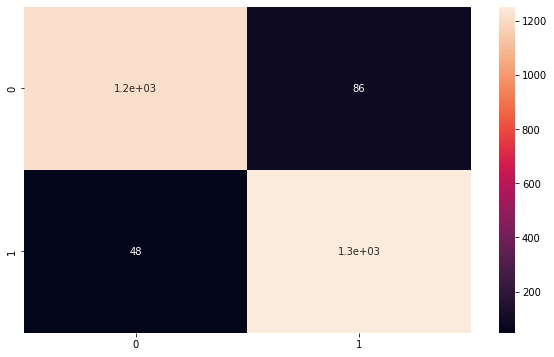

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions), annot=True)

In [65]:
para_cell

'C:\\Users\\JATIN\\Downloads\\cell_images\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [67]:
from tensorflow.keras.preprocessing import image

In [68]:
my_image = image.load_img(para_cell,target_size=image_shape)

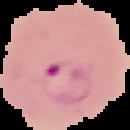

In [69]:
my_image

In [70]:
my_image = image.img_to_array(my_image)

In [71]:
my_image.shape

(130, 130, 3)

In [72]:
my_image = np.expand_dims(my_image, axis=0)

In [73]:
my_image.shape

(1, 130, 130, 3)

In [76]:
predict = model.predict(my_image)

1/1 [==============================] - 0s 42ms/step


In [77]:
predict


array([[0.]], dtype=float32)

In [80]:
if(predict<0.5):
    print('false')
else:
    print('true')

false


## DONE